The purpose of this notebook is to combine the read counts for each of the 2 screens to freeze, and then proceed with these reads to LFC using poola. These LFC files will become the inputs to the downstream analyses

In [62]:
import pandas as pd
from poola import core as pool
from functools import reduce
import seaborn as sns
from scipy.stats import pearsonr

CP1520

In [2]:
plate_1 = pd.read_table('../../data_v3/Fig 2_HF off-targets/raw/counts-A375_CP1520_085A (1).txt')

In [5]:
plate_1.head()

,Construct Barcode,Construct IDs,A375;CP1559;RDA_275;A;21;Dropout;,A375;CP1559;RDA_275;B;21;Dropout;,A375;CP1520;RDA_085;A;21;Dropout;,;;;;;;,pDNA;CP1559;;;;;,water;;;;;;
0,AGACCGGAGAATCCGCATCG,CIAO1,0,0,48,0,0,0
1,TGACCGGAGAATCCGCATCG,CIAO1,0,0,253,0,0,0
2,GGACCGGAGAATCCGCATCG,CIAO1,0,0,29,0,0,0
3,CAACCGGAGAATCCGCATCG,CIAO1,0,0,71,0,0,0
4,CTACCGGAGAATCCGCATCG,CIAO1,0,0,29,0,0,0


In [3]:
plate_2 = pd.read_table('../../data_v3/Fig 2_HF off-targets/raw/counts-A375_CP1520_Plate2 (1).txt')

In [6]:
plate_2.head()

,Construct Barcode,Construct IDs,A375;CP1520;RDA_085;B;21;;,A375;CP1520;RDA_152;A;21;;,A375;CP1520;RDA_152;B;21;;,;;;;;;,A375;CP1520;RDA_381;A;21;;,A375;CP1520;RDA_381;B;21;;,pDNA;CP1520;;;;;
0,AGACCGGAGAATCCGCATCG,CIAO1,40,32,64,0,61,138,231
1,TGACCGGAGAATCCGCATCG,CIAO1,42,34,31,0,78,82,325
2,GGACCGGAGAATCCGCATCG,CIAO1,26,29,54,0,15,108,255
3,CAACCGGAGAATCCGCATCG,CIAO1,50,29,80,0,42,36,314
4,CTACCGGAGAATCCGCATCG,CIAO1,34,28,19,0,11,65,206


In [4]:
print(plate_1.shape)
print(plate_2.shape)

(34537, 8)
(34537, 9)


Merge the 2 files

In [7]:
cp150_all = pd.merge(plate_1, plate_2, on='Construct Barcode')

In [9]:
print(cp150_all.shape)
cp150_all.head()

(34537, 16)


,Construct Barcode,Construct IDs_x,A375;CP1559;RDA_275;A;21;Dropout;,A375;CP1559;RDA_275;B;21;Dropout;,A375;CP1520;RDA_085;A;21;Dropout;,;;;;;;_x,pDNA;CP1559;;;;;,water;;;;;;,Construct IDs_y,A375;CP1520;RDA_085;B;21;;,A375;CP1520;RDA_152;A;21;;,A375;CP1520;RDA_152;B;21;;,;;;;;;_y,A375;CP1520;RDA_381;A;21;;,A375;CP1520;RDA_381;B;21;;,pDNA;CP1520;;;;;
0,AGACCGGAGAATCCGCATCG,CIAO1,0,0,48,0,0,0,CIAO1,40,32,64,0,61,138,231
1,TGACCGGAGAATCCGCATCG,CIAO1,0,0,253,0,0,0,CIAO1,42,34,31,0,78,82,325
2,GGACCGGAGAATCCGCATCG,CIAO1,0,0,29,0,0,0,CIAO1,26,29,54,0,15,108,255
3,CAACCGGAGAATCCGCATCG,CIAO1,0,0,71,0,0,0,CIAO1,50,29,80,0,42,36,314
4,CTACCGGAGAATCCGCATCG,CIAO1,0,0,29,0,0,0,CIAO1,34,28,19,0,11,65,206


Clean this file up --

Drop CP1559 reads - these will be processed separately

Remove empty wells


In [12]:
cleaned_cp150 = cp150_all.drop(columns=['A375;CP1559;RDA_275;A;21;Dropout;', 'A375;CP1559;RDA_275;B;21;Dropout;',
                                       ';;;;;;_x', 'pDNA;CP1559;;;;;', 'water;;;;;;','Construct IDs_y',';;;;;;_y'])

In [13]:
cleaned_cp150.head()

,Construct Barcode,Construct IDs_x,A375;CP1520;RDA_085;A;21;Dropout;,A375;CP1520;RDA_085;B;21;;,A375;CP1520;RDA_152;A;21;;,A375;CP1520;RDA_152;B;21;;,A375;CP1520;RDA_381;A;21;;,A375;CP1520;RDA_381;B;21;;,pDNA;CP1520;;;;;
0,AGACCGGAGAATCCGCATCG,CIAO1,48,40,32,64,61,138,231
1,TGACCGGAGAATCCGCATCG,CIAO1,253,42,34,31,78,82,325
2,GGACCGGAGAATCCGCATCG,CIAO1,29,26,29,54,15,108,255
3,CAACCGGAGAATCCGCATCG,CIAO1,71,50,29,80,42,36,314
4,CTACCGGAGAATCCGCATCG,CIAO1,29,34,28,19,11,65,206


Rename columns

These screens were all pelleted on D21- this can be indicated in methods, and dropped from meta file. Likewise for "Dropout" descriptor

In [14]:
cleaned_cp150 = cleaned_cp150.rename(columns={'Construct IDs_x' : 'Construct IDs',
                                             'A375;CP1520;RDA_085;A;21;Dropout;': 'A375_CP1520_RDA085_Rep A',
                                             'A375;CP1520;RDA_085;B;21;;': 'A375_CP1520_RDA085_Rep B',
                                             'A375;CP1520;RDA_152;A;21;;': 'A375_CP1520_RDA152_Rep A',
                                             'A375;CP1520;RDA_152;B;21;;': 'A375_CP1520_RDA152_Rep B',
                                             'A375;CP1520;RDA_381;A;21;;': 'A375_CP1520_RDA381_Rep A',
                                             'A375;CP1520;RDA_381;B;21;;': 'A375_CP1520_RDA381_Rep B',
                                             'pDNA;CP1520;;;;;': 'pDNA_CP1520'})

In [15]:
cleaned_cp150.head()

,Construct Barcode,Construct IDs,A375_CP1520_RDA085_Rep A,A375_CP1520_RDA085_Rep B,A375_CP1520_RDA152_Rep A,A375_CP1520_RDA152_Rep B,A375_CP1520_RDA381_Rep A,A375_CP1520_RDA381_Rep B,pDNA_CP1520
0,AGACCGGAGAATCCGCATCG,CIAO1,48,40,32,64,61,138,231
1,TGACCGGAGAATCCGCATCG,CIAO1,253,42,34,31,78,82,325
2,GGACCGGAGAATCCGCATCG,CIAO1,29,26,29,54,15,108,255
3,CAACCGGAGAATCCGCATCG,CIAO1,71,50,29,80,42,36,314
4,CTACCGGAGAATCCGCATCG,CIAO1,29,34,28,19,11,65,206


In [16]:
cleaned_cp150.to_csv('../../data_v3/Fig 2_HF off-targets/raw/HF_off-target_CP1520_reads_collated_v1.txt', sep='\t')

CP1559

In [17]:
spg_reads = pd.read_table('../../data_v3/Fig 4_PAM flex off-targets/raw/counts-AKS_A375_RDA449_CP1559 (1).txt')

In [21]:
print(spg_reads.shape)
spg_reads.head()

(79075, 6)


,Construct Barcode,Construct IDs,A375_RDA449_CP1559;Dropout;RepA;D21,Unnamed: 3,A375_RDA449_CP1559;Dropout;RepB;D21,CP1559_M-AK35_AAFX03_RDA118;pDNA
0,AACAACATGCGGGTGATGAG,EEF2,72,0,166,119
1,TACAACATGCGGGTGATGAG,EEF2,20,1,5,209
2,GACAACATGCGGGTGATGAG,EEF2,14,0,17,70
3,CTCAACATGCGGGTGATGAG,EEF2,33,0,46,184
4,CCCAACATGCGGGTGATGAG,EEF2,34,0,74,193


In [18]:
ng_reads = pd.read_table('../../data_v3/Fig 4_PAM flex off-targets/raw/counts-A375_CP1559_Cas9NG_offtarget_v2 (1).txt')

In [22]:
print(ng_reads.shape)
ng_reads.head()

(79075, 8)


,Construct Barcode,Construct IDs,A375;CP1559;RDA_275;A;21;Dropout;,A375;CP1559;RDA_275;B;21;Dropout;,A375;CP1520;RDA_085;A;21;Dropout;,;;;;;;,pDNA;CP1559;;;;;,water;;;;;;
0,AACAACATGCGGGTGATGAG,EEF2,19,15,0,0,24,0
1,TACAACATGCGGGTGATGAG,EEF2,35,10,0,0,69,0
2,GACAACATGCGGGTGATGAG,EEF2,6,33,0,0,33,0
3,CTCAACATGCGGGTGATGAG,EEF2,20,35,0,0,43,0
4,CCCAACATGCGGGTGATGAG,EEF2,6,19,0,0,49,0


Merge files on Construct Barcode

In [23]:
cp1559_all = pd.merge(spg_reads, ng_reads, on = 'Construct Barcode')

In [24]:
cp1559_all.head()

,Construct Barcode,Construct IDs_x,A375_RDA449_CP1559;Dropout;RepA;D21,Unnamed: 3,A375_RDA449_CP1559;Dropout;RepB;D21,CP1559_M-AK35_AAFX03_RDA118;pDNA,Construct IDs_y,A375;CP1559;RDA_275;A;21;Dropout;,A375;CP1559;RDA_275;B;21;Dropout;,A375;CP1520;RDA_085;A;21;Dropout;,;;;;;;,pDNA;CP1559;;;;;,water;;;;;;
0,AACAACATGCGGGTGATGAG,EEF2,72,0,166,119,EEF2,19,15,0,0,24,0
1,TACAACATGCGGGTGATGAG,EEF2,20,1,5,209,EEF2,35,10,0,0,69,0
2,GACAACATGCGGGTGATGAG,EEF2,14,0,17,70,EEF2,6,33,0,0,33,0
3,CTCAACATGCGGGTGATGAG,EEF2,33,0,46,184,EEF2,20,35,0,0,43,0
4,CCCAACATGCGGGTGATGAG,EEF2,34,0,74,193,EEF2,6,19,0,0,49,0


<AxesSubplot:xlabel='CP1559_M-AK35_AAFX03_RDA118;pDNA', ylabel='pDNA;CP1559;;;;;'>

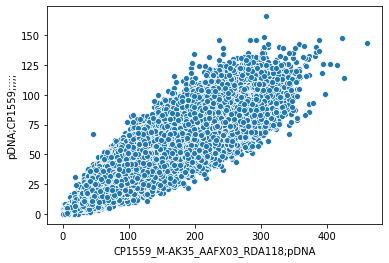

In [27]:
sns.scatterplot(data=cp1559_all, x='CP1559_M-AK35_AAFX03_RDA118;pDNA',y='pDNA;CP1559;;;;;')

Because these enzymes were screened at separate times, pDNA was sequenced twice. pDNA looks well-correlated, so we'll sum the pDNA and use this sum to calculate lognorms at a later step

In [28]:
cp1559_all['CP1559_pDNA_summed'] = cp1559_all[['CP1559_M-AK35_AAFX03_RDA118;pDNA', 'pDNA;CP1559;;;;;']].sum(axis=1)

In [29]:
cp1559_all.head()

,Construct Barcode,Construct IDs_x,A375_RDA449_CP1559;Dropout;RepA;D21,Unnamed: 3,A375_RDA449_CP1559;Dropout;RepB;D21,CP1559_M-AK35_AAFX03_RDA118;pDNA,Construct IDs_y,A375;CP1559;RDA_275;A;21;Dropout;,A375;CP1559;RDA_275;B;21;Dropout;,A375;CP1520;RDA_085;A;21;Dropout;,;;;;;;,pDNA;CP1559;;;;;,water;;;;;;,CP1559_pDNA_summed
0,AACAACATGCGGGTGATGAG,EEF2,72,0,166,119,EEF2,19,15,0,0,24,0,143
1,TACAACATGCGGGTGATGAG,EEF2,20,1,5,209,EEF2,35,10,0,0,69,0,278
2,GACAACATGCGGGTGATGAG,EEF2,14,0,17,70,EEF2,6,33,0,0,33,0,103
3,CTCAACATGCGGGTGATGAG,EEF2,33,0,46,184,EEF2,20,35,0,0,43,0,227
4,CCCAACATGCGGGTGATGAG,EEF2,34,0,74,193,EEF2,6,19,0,0,49,0,242


Clean up

- Drop unneccesary columns

- Change column names

In [36]:
cleaned_cp1559 = cp1559_all.drop(columns=['Unnamed: 3', 'Construct IDs_y', ';;;;;;', 'water;;;;;;', 'A375;CP1520;RDA_085;A;21;Dropout;',
                                         'CP1559_M-AK35_AAFX03_RDA118;pDNA', 'pDNA;CP1559;;;;;'])

In [37]:
cleaned_cp1559 = cleaned_cp1559.rename(columns={'Construct IDs_x' : 'Construct IDs',
                                               'A375_RDA449_CP1559;Dropout;RepA;D21': 'A375_CP1559_RDA449_Rep A',
                                               'A375_RDA449_CP1559;Dropout;RepB;D21': 'A375_CP1559_RDA449_Rep B',
                                               'A375;CP1559;RDA_275;A;21;Dropout;': 'A375_CP1559_RDA275_Rep A',
                                               'A375;CP1559;RDA_275;B;21;Dropout;': 'A375_CP1559_RDA275_Rep B'})

In [38]:
cleaned_cp1559.head()

,Construct Barcode,Construct IDs,A375_CP1559_RDA449_Rep A,A375_CP1559_RDA449_Rep B,A375_CP1559_RDA275_Rep A,A375_CP1559_RDA275_Rep B,CP1559_pDNA_summed
0,AACAACATGCGGGTGATGAG,EEF2,72,166,19,15,143
1,TACAACATGCGGGTGATGAG,EEF2,20,5,35,10,278
2,GACAACATGCGGGTGATGAG,EEF2,14,17,6,33,103
3,CTCAACATGCGGGTGATGAG,EEF2,33,46,20,35,227
4,CCCAACATGCGGGTGATGAG,EEF2,34,74,6,19,242


In [39]:
cleaned_cp1559.to_csv('../../data_v3/Fig 4_PAM flex off-targets/raw/PAMflex_off-target_CP1559_reads_collated_v1.txt', sep='\t')

Now that we have collated reads for each screen, we can calculate lognorms and log2-fold changes using poola

CP1520

In [42]:
cp1520_reads = pd.read_table('../../data_v3/Fig 2_HF off-targets/raw/HF_off-target_CP1520_reads_collated_v1.txt')

In [47]:
col = cp1520_reads.columns
cols = col[2:]
cols

Index(['A375_CP1520_RDA085_Rep A', 'A375_CP1520_RDA085_Rep B',
       'A375_CP1520_RDA152_Rep A', 'A375_CP1520_RDA152_Rep B',
       'A375_CP1520_RDA381_Rep A', 'A375_CP1520_RDA381_Rep B', 'pDNA_CP1520'],
      dtype='object')

In [52]:
lognorms = pool.lognorm_columns(reads_df=cp1520_reads, columns=cols)
filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['pDNA_CP1520'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 494 columns due to low pDNA abundance


Save both the lognorm and filtered lognorm file in the "interim" folder

In [53]:
lognorms.to_csv('../../data_v3/Fig 2_HF off-targets/interim/HF_off-target_CP1520_lognorm_v1.txt', sep ='\t')

In [54]:
filtered_lognorms.to_csv('../../data_v3/Fig 2_HF off-targets/interim/HF_off-target_CP1520_filtered_lognorm_v1.txt', sep ='\t')

In [58]:
lfc_df = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_col='pDNA_CP1520', target_cols=(cols[:-1]))


In [59]:
lfc_df.head()

,Construct Barcode,Construct IDs,A375_CP1520_RDA085_Rep A,A375_CP1520_RDA085_Rep B,A375_CP1520_RDA152_Rep A,A375_CP1520_RDA152_Rep B,A375_CP1520_RDA381_Rep A,A375_CP1520_RDA381_Rep B
0,AGACCGGAGAATCCGCATCG,CIAO1,-3.631751,-3.126289,-3.452064,-2.837448,-2.314554,-2.274860
1,TGACCGGAGAATCCGCATCG,CIAO1,-2.356161,-3.555084,-3.875818,-4.012416,-2.494642,-3.341603
2,GGACCGGAGAATCCGCATCG,CIAO1,-4.127430,-3.660531,-3.674343,-3.153324,-3.846161,-2.698239
3,CAACCGGAGAATCCGCATCG,CIAO1,-3.720605,-3.326865,-3.965740,-3.020625,-3.170036,-4.065199
4,CTACCGGAGAATCCGCATCG,CIAO1,-3.830729,-3.124115,-3.406966,-3.745652,-3.769657,-2.944939


In [60]:
lfc_df.to_csv('../../data_v3/Fig 2_HF off-targets/processed/HF_off-target_CP1520_lfc_v1.txt', sep ='\t')

In [63]:
print(pearsonr(lfc_df['A375_CP1520_RDA085_Rep A'], lfc_df['A375_CP1520_RDA085_Rep B']))

print(pearsonr(lfc_df['A375_CP1520_RDA152_Rep A'], lfc_df['A375_CP1520_RDA152_Rep B']))

print(pearsonr(lfc_df['A375_CP1520_RDA381_Rep A'], lfc_df['A375_CP1520_RDA381_Rep B']))

(0.9323294567868058, 0.0)
(0.9074829992410197, 0.0)
(0.9010293179458297, 0.0)


Calculate average LFCs across replicates

In [64]:
lfc_df['A375_CP1520_RDA085_AVGLFC_frompDNA'] = lfc_df[['A375_CP1520_RDA085_Rep A', 'A375_CP1520_RDA085_Rep B']].mean(axis =1)
lfc_df['A375_CP1520_RDA152_AVGLFC_frompDNA'] = lfc_df[['A375_CP1520_RDA152_Rep A', 'A375_CP1520_RDA152_Rep B']].mean(axis =1)
lfc_df['A375_CP1520_RDA381_AVGLFC_frompDNA'] = lfc_df[['A375_CP1520_RDA381_Rep A', 'A375_CP1520_RDA381_Rep B']].mean(axis =1)


Save this file (which includes single rep, and avg lfc) for each cell line screened. This will be the input for the rest of our downstream analyses

In [65]:
lfc_df.to_csv('../../data_v3/Fig 2_HF off-targets/processed/HF_off-target_CP1520_avglfc_v1.txt', sep ='\t')

CP1559

In [66]:
cp1559_reads = pd.read_table('../../data_v3/Fig 4_PAM flex off-targets/raw/PAMflex_off-target_CP1559_reads_collated_v1.txt')

In [68]:
col = cp1559_reads.columns
cols = col[2:]
cols

Index(['A375_CP1559_RDA449_Rep A', 'A375_CP1559_RDA449_Rep B',
       'A375_CP1559_RDA275_Rep A', 'A375_CP1559_RDA275_Rep B',
       'CP1559_pDNA_summed'],
      dtype='object')

In [69]:
lognorms = pool.lognorm_columns(reads_df=cp1559_reads, columns=cols)
filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP1559_pDNA_summed'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 1017 columns due to low pDNA abundance


Save both the lognorm and filtered lognorm file in the "interim" folder

In [71]:
lognorms.to_csv('../../data_v3/Fig 4_PAM flex off-targets/interim/PAMflex_off-target_CP1559_lognorm_v1.txt', sep ='\t')

In [73]:
filtered_lognorms.to_csv('../../data_v3/Fig 4_PAM flex off-targets/interim/PAMflex_off-target_CP1559_filtered_lognorm_v1.txt', sep ='\t')

In [74]:
lfc_df = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_col='CP1559_pDNA_summed', target_cols=(cols[:-1]))


In [75]:
lfc_df.head()

,Construct Barcode,Construct IDs,A375_CP1559_RDA449_Rep A,A375_CP1559_RDA449_Rep B,A375_CP1559_RDA275_Rep A,A375_CP1559_RDA275_Rep B
0,AACAACATGCGGGTGATGAG,EEF2,-2.156974,-1.291767,-2.417786,-2.561979
1,TACAACATGCGGGTGATGAG,EEF2,-3.778811,-4.076727,-2.828993,-3.659679
2,GACAACATGCGGGTGATGAG,EEF2,-2.588589,-2.504549,-2.550533,-1.569272
3,CTCAACATGCGGGTGATGAG,EEF2,-3.282269,-3.041032,-2.995083,-2.547892
4,CCCAACATGCGGGTGATGAG,EEF2,-3.352985,-2.771459,-3.667303,-3.111651


In [76]:
lfc_df.to_csv('../../data_v3/Fig 4_PAM flex off-targets/processed/PAMflex_off-target_CP1559_lfc_v1.txt', sep ='\t')

In [77]:
print(pearsonr(lfc_df['A375_CP1559_RDA449_Rep A'], lfc_df['A375_CP1559_RDA449_Rep B']))

print(pearsonr(lfc_df['A375_CP1559_RDA275_Rep A'], lfc_df['A375_CP1559_RDA275_Rep B']))


(0.7564691257744112, 0.0)
(0.8125195671984426, 0.0)


Calculate average LFCs across replicates

In [78]:
lfc_df['A375_CP1559_RDA449_AVGLFC_frompDNA'] = lfc_df[['A375_CP1559_RDA449_Rep A', 'A375_CP1559_RDA449_Rep B']].mean(axis =1)
lfc_df['A375_CP1559_RDA275_AVGLFC_frompDNA'] = lfc_df[['A375_CP1559_RDA275_Rep A', 'A375_CP1559_RDA275_Rep B']].mean(axis =1)


In [79]:
lfc_df.to_csv('../../data_v3/Fig 4_PAM flex off-targets/processed/PAMflex_off-target_CP1559_avglfc_v1.txt', sep ='\t')